# Sheet 1 - Practical Exercise
The datasets we will be using throughout this practical exercises of this course is a subset of the *FIFA 22 complete player dataset* from kaggle.com, which is extracted from a recent edition of FIFA, a football simulation game. In this dataset the player's attributes like personal data (e.g. Nationality, Club, Age, Value, …) and performances (e.g. Agression, Agility, Overall, Potential, …) are collected. (See [FIFA 22 complete player dataset](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) for details.)

---

Before we start with the actual exercises make sure that you have imported all packages that you need, and loaded the dataset.

In [1]:
%pip install seaborn

In [2]:
# Add your imports and load your data here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

players_df = pd.read_csv('data/players_22.csv', engine='python')
players_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


## Exercise 1


First create a smaller Dataframe containing only the columns relevant for the coming exercises. These columns are:
- ``short_name``
- ``age``
- ``club_name``
- ``overall``
- ``potential``
- ``value_eur``
- ``wage_eur``
- ``club_position``

In [3]:
# add code creating a Dataframe with a subset of all available columns
small_df = players_df.loc[:,["short_name", "age", "club_name", "overall", "potential", "value_eur", "wage_eur", "club_position"]]

Next write a scaler to scale the values of a column to an interval between a new minimum and maximum value.  
It should use the following signature:

_Hint: Do **not** use a loop over all entries of the column! What other ways are there to manipulate columnar data?_

In [4]:
def my_scaler(column,min_new,max_new):
    # Add your code here
    # find min_old find max_old
    min_old = column.min()
    max_old = column.max()
    scaled_column = column.apply(lambda v : ((max_new - min_new) / (max_old - min_old) * (v-min_old)) + min_new )
    return scaled_column

To achieve this your scaler can implement the formula:  
$$\frac{max_{new}-min_{new}}{max_{old}-min_{old}}\cdot (v-min_{old})+min_{new}$$
where $max_{new}$ and $min_{new}$ are the new boundaries of the values, $max_{old}$ and $min_{old}$ are the old boundaries and $v$ is a value from the column that will be scaled.

* Now use your scaler on the column ``value_eur`` and scale it to an interval between $0$ and $100$.  
* Then take the new values for the ``value_eur`` und turn them into discrete values. If a player is below $25$ he should be categorized as ``low``, between $25$ and $50$ he should be categorized as ``low_average`` then between $50$ and $75$ as ``high_average`` and finally any that are above $75$ should be categorized as ``high``.  
* Finally create a histogram to show the distribution of the players' value.

In [5]:
# Add code to use your scaler on the value_eur-column
small_df["value_eur"] = my_scaler(small_df["value_eur"], 0, 100)
small_df

,short_name,age,club_name,overall,potential,value_eur,wage_eur,club_position
0,L. Messi,34,Paris Saint-Germain,93,93,40.203411,320000.0,RW
1,R. Lewandowski,32,FC Bayern München,92,92,61.596157,270000.0,ST
2,Cristiano Ronaldo,36,Manchester United,91,91,23.192313,270000.0,ST
3,Neymar Jr,29,Paris Saint-Germain,91,91,66.493291,270000.0,LW
4,K. De Bruyne,30,Manchester City,91,91,64.689084,350000.0,RCM
...,...,...,...,...,...,...,...,...
19234,Song Defu,22,Wuhan FC,47,52,0.031445,1000.0,SUB
19235,C. Porter,19,Derry City,47,59,0.052064,500.0,RES
19236,N. Logue,21,Finn Harps,47,55,0.046909,500.0,RES
19237,L. Rudden,19,Finn Harps,47,60,0.052064,500.0,RES


In [6]:
# Add code to turn the new values of the value_eur column into the given discrete values
conditions = [
    small_df["value_eur"] < 25,
    small_df["value_eur"] < 50,
    small_df["value_eur"] < 75,
    small_df["value_eur"] >= 75
]

labels = [
    'low',
    'low_average',
    'high_average',
    'high'
]

small_df["value_eur"] = np.select(conditions, labels)
small_df

,short_name,age,club_name,overall,potential,value_eur,wage_eur,club_position
0,L. Messi,34,Paris Saint-Germain,93,93,low_average,320000.0,RW
1,R. Lewandowski,32,FC Bayern München,92,92,high_average,270000.0,ST
2,Cristiano Ronaldo,36,Manchester United,91,91,low,270000.0,ST
3,Neymar Jr,29,Paris Saint-Germain,91,91,high_average,270000.0,LW
4,K. De Bruyne,30,Manchester City,91,91,high_average,350000.0,RCM
...,...,...,...,...,...,...,...,...
19234,Song Defu,22,Wuhan FC,47,52,low,1000.0,SUB
19235,C. Porter,19,Derry City,47,59,low,500.0,RES
19236,N. Logue,21,Finn Harps,47,55,low,500.0,RES
19237,L. Rudden,19,Finn Harps,47,60,low,500.0,RES


<AxesSubplot:>

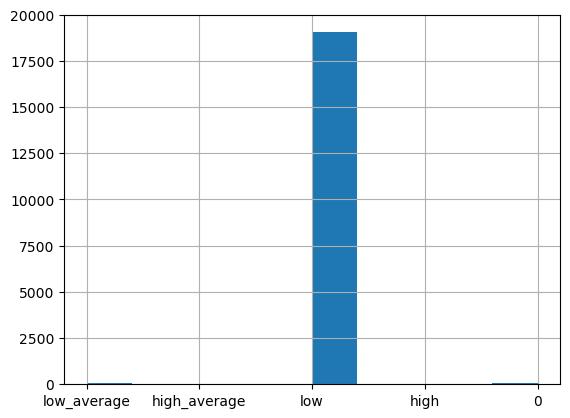

In [7]:
# Add code to create a histogram
small_df["value_eur"].hist()

## Exercise 2

Create a new column called ``leftover-potential`` which shows the difference between the value of ``overall`` and the value of ``potential``, to show how much more a given player can still grow.

In [16]:
# Add code to create the 'leftover-potential'-column
small_df["leftover-potential"] = small_df["potential"] - small_df["overall"]
small_df

,short_name,age,club_name,overall,potential,value_eur,wage_eur,club_position,leftover-potential
0,L. Messi,34,Paris Saint-Germain,93,93,low_average,320000.0,RW,0
1,R. Lewandowski,32,FC Bayern München,92,92,high_average,270000.0,ST,0
2,Cristiano Ronaldo,36,Manchester United,91,91,low,270000.0,ST,0
3,Neymar Jr,29,Paris Saint-Germain,91,91,high_average,270000.0,LW,0
4,K. De Bruyne,30,Manchester City,91,91,high_average,350000.0,RCM,0
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,Wuhan FC,47,52,low,1000.0,SUB,5
19235,C. Porter,19,Derry City,47,59,low,500.0,RES,12
19236,N. Logue,21,Finn Harps,47,55,low,500.0,RES,8
19237,L. Rudden,19,Finn Harps,47,60,low,500.0,RES,13


Next create a histogram that shows how often how much potential is still left over.

<AxesSubplot:>

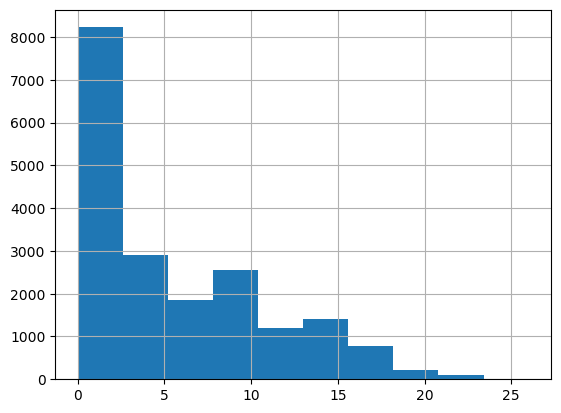

In [24]:
# Add code to create the histogram
small_df["leftover-potential"].hist()

## Exercise 3

Group the players by the club they are playing for. Then calculate the average of the ``overall`` column for each team.  

In [29]:
# Add code to group players and calculate the average 'overall' value of each club
df_clubs = small_df.groupby(["club_name"])["overall"].mean()
df_clubs

club_name
1. FC Heidenheim 1846        66.925926
1. FC Kaiserslautern         62.821429
1. FC Köln                   69.161290
1. FC Magdeburg              62.107143
1. FC Nürnberg               65.689655
                               ...    
Örebro SK                    61.440000
Östersunds FK                61.666667
İstanbul Başakşehir FK       70.000000
İttifak Holding Konyaspor    67.750000
Śląsk Wrocław                62.964286
Name: overall, Length: 701, dtype: float64

Then print the five Teams with the highest as well as the five teams with the lowest average ``overall`` value, so we can see which teams are the strongest and which teams are the weakest.

In [34]:
# Add code to select the strongest and weakest teams
print(df_clubs.nlargest(5))
print(df_clubs.nsmallest(5))

club_name
Juventus               79.961538
Paris Saint-Germain    79.454545
Inter                  78.857143
FC Bayern München      78.071429
Manchester United      78.000000
Name: overall, dtype: float64
club_name
Longford Town          53.680000
NorthEast United FC    53.952381
SC East Bengal FC      54.259259
Odisha FC              54.857143
Derry City             55.038462
Name: overall, dtype: float64


Next determine the sum of the ``wages`` of each team. Print the five teams with the highest total ``wages`` and the five teams with the lowest total ``wages``, but only those that spend more than 0€ in total.

In [45]:
# Add code to calculate the total wages and print the highest and lowest spenders
df_wages = small_df.groupby(["club_name"])["wage_eur"].sum()
print(df_wages.nlargest(5))
df_wages[df_wages > 0].dropna()
print(df_wages.nsmallest(5))

club_name
Real Madrid CF       4394000.0
Manchester City      3610400.0
Manchester United    3407000.0
FC Barcelona         3230000.0
Liverpool            3211000.0
Name: wage_eur, dtype: float64
club_name
Cerro Largo Fútbol Club      10000.0
Club River Plate Asunción    10000.0
Centro Atlético Fénix        10100.0
12 de Octubre FC             10150.0
Montevideo City Torque       10150.0
Name: wage_eur, dtype: float64
